# Improving correlation precision
#### Options

1. *Normalization of Data*: Normalize both the larger set and the segment before calculating the correlation. This ensures that the correlation score reflects the shape more than the magnitude.

2. *Windowing*: Apply a Gaussian or other tapering window to the segment, reducing edge effects that can cause spurious correlations.

3. *Zero Padding*: Pad the segment with zeros at the ends, allowing it to match better with portions of the larger set that don’t have a high correlation.

4. *Cross-Correlation using scipy.signal.correlate*: Ensure we use the most precise correlation technique, with appropriate settings.

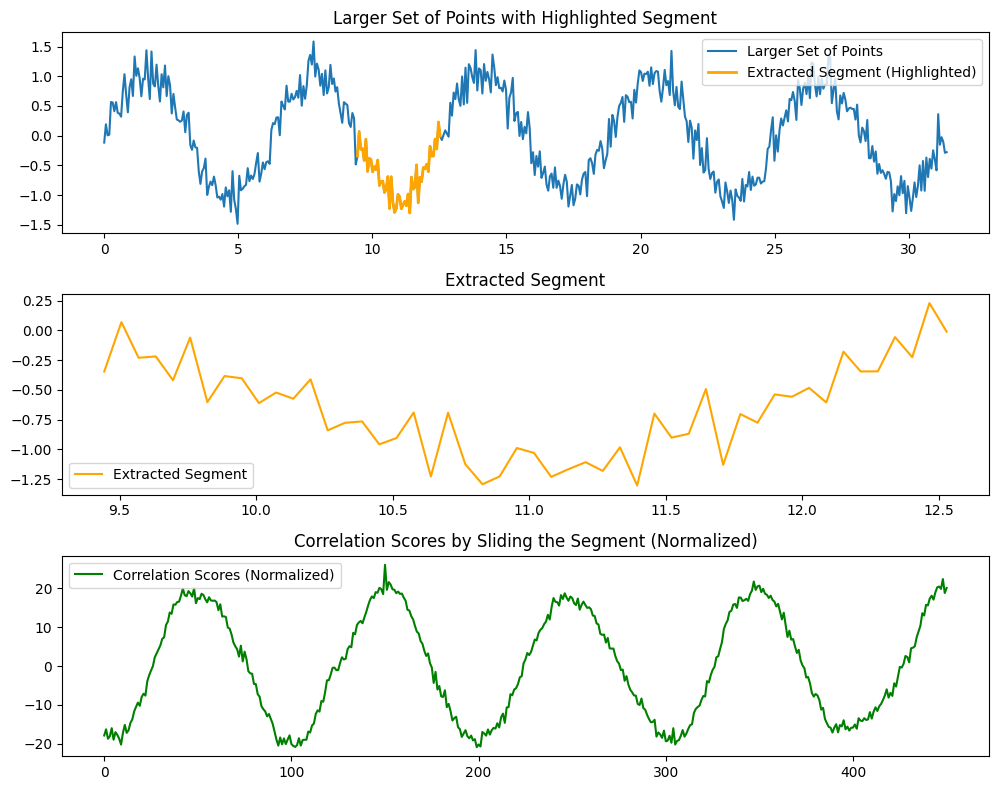

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Step 1: Generate a large set of points (e.g., noisy sine wave)
x = np.linspace(0, 10*np.pi, 500)
y = np.sin(x) + 0.2 * np.random.randn(len(x))  # Noisy sine wave

# Step 2: Extract a random segment
segment_start = 150
segment_length = 50
segment = y[segment_start:segment_start + segment_length]

# Step 3: Normalize both the larger set and the segment
y_normalized = (y - np.mean(y)) / np.std(y)
segment_normalized = (segment - np.mean(segment)) / np.std(segment)

# Step 4: Compute cross-correlation by sliding the normalized segment over the normalized larger set
correlation_scores = correlate(y_normalized, segment_normalized, mode='valid')

# Step 5: Visualization
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Plot the larger set of points and highlight the segment
axs[0].plot(x, y, label="Larger Set of Points")
axs[0].plot(x[segment_start:segment_start + segment_length], segment, label="Extracted Segment (Highlighted)", color='orange', linewidth=2)
axs[0].set_title("Larger Set of Points with Highlighted Segment")
axs[0].legend()

# Plot the extracted segment
segment_x = x[segment_start:segment_start + segment_length]
axs[1].plot(segment_x, segment, label="Extracted Segment", color='orange')
axs[1].set_title("Extracted Segment")
axs[1].legend()

# Plot normalized correlation scores as the segment slides
shift_x = np.arange(len(correlation_scores))
axs[2].plot(shift_x, correlation_scores, label="Correlation Scores (Normalized)", color='green')
axs[2].set_title("Correlation Scores by Sliding the Segment (Normalized)")
axs[2].legend()

plt.tight_layout()
plt.show()


/tmp/ipykernel_46813/817796630.py:23: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  smoothed_correlation_scores = filters.gaussian_filter1d(correlation_scores, sigma=2)


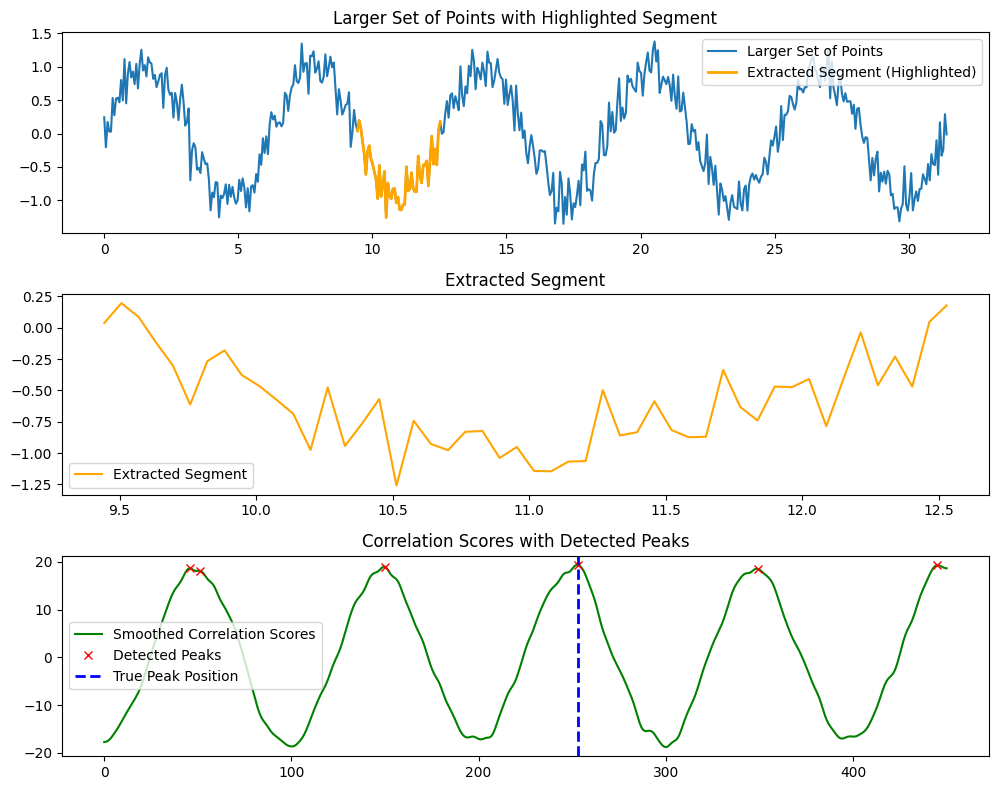

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, find_peaks, gaussian
from scipy.ndimage import filters

# Step 1: Generate a large set of points (e.g., noisy sine wave)
x = np.linspace(0, 10*np.pi, 500)
y = np.sin(x) + 0.2 * np.random.randn(len(x))  # Noisy sine wave

# Step 2: Extract a random segment
segment_start = 150
segment_length = 50
segment = y[segment_start:segment_start + segment_length]

# Step 3: Normalize both the larger set and the segment
y_normalized = (y - np.mean(y)) / np.std(y)
segment_normalized = (segment - np.mean(segment)) / np.std(segment)

# Step 4: Compute cross-correlation by sliding the normalized segment over the normalized larger set
correlation_scores = correlate(y_normalized, segment_normalized, mode='valid')

# Step 5: Apply Gaussian smoothing to the correlation scores to reduce noise
smoothed_correlation_scores = filters.gaussian_filter1d(correlation_scores, sigma=2)

# Step 6: Find the peaks in the smoothed correlation scores
peaks, _ = find_peaks(smoothed_correlation_scores, height=0.5)  # Adjust height threshold as needed

# Find the peak closest to the actual segment position (for visualization purposes)
actual_position_peak = np.argmax(smoothed_correlation_scores)

# Step 7: Visualization
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Plot the larger set of points and highlight the segment
axs[0].plot(x, y, label="Larger Set of Points")
axs[0].plot(x[segment_start:segment_start + segment_length], segment, label="Extracted Segment (Highlighted)", color='orange', linewidth=2)
axs[0].set_title("Larger Set of Points with Highlighted Segment")
axs[0].legend()

# Plot the extracted segment
segment_x = x[segment_start:segment_start + segment_length]
axs[1].plot(segment_x, segment, label="Extracted Segment", color='orange')
axs[1].set_title("Extracted Segment")
axs[1].legend()

# Plot smoothed correlation scores and mark the detected peaks
shift_x = np.arange(len(smoothed_correlation_scores))
axs[2].plot(shift_x, smoothed_correlation_scores, label="Smoothed Correlation Scores", color='green')
axs[2].plot(peaks, smoothed_correlation_scores[peaks], "x", label="Detected Peaks", color='red')
axs[2].axvline(actual_position_peak, color='blue', linestyle='--', label='True Peak Position', linewidth=2)
axs[2].set_title("Correlation Scores with Detected Peaks")
axs[2].legend()

plt.tight_layout()
plt.show()

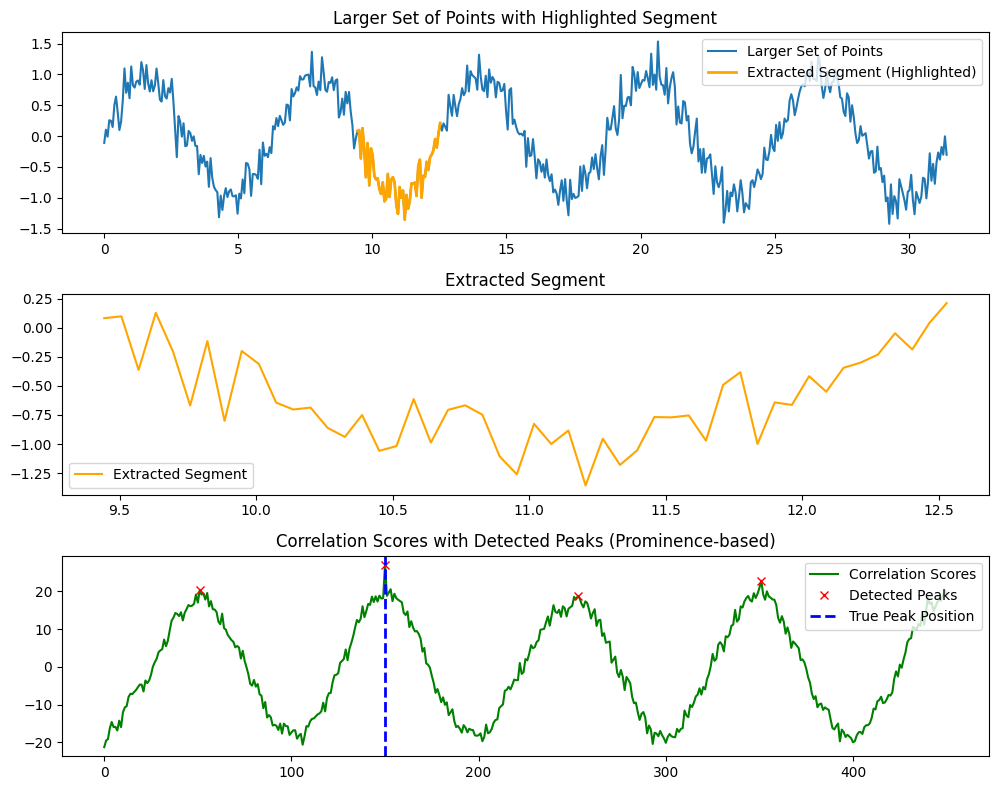

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, find_peaks

# Step 1: Generate a large set of points (e.g., noisy sine wave)
x = np.linspace(0, 10*np.pi, 500)
y = np.sin(x) + 0.2 * np.random.randn(len(x))  # Noisy sine wave

# Step 2: Extract a random segment
segment_start = 150
segment_length = 50
segment = y[segment_start:segment_start + segment_length]

# Step 3: Normalize both the larger set and the segment
y_normalized = (y - np.mean(y)) / np.std(y)
segment_normalized = (segment - np.mean(segment)) / np.std(segment)

# Step 4: Compute cross-correlation by sliding the normalized segment over the normalized larger set
correlation_scores = correlate(y_normalized, segment_normalized, mode='valid')

# Step 5: Find the peaks in the raw correlation scores using prominence
peaks, properties = find_peaks(correlation_scores, prominence=5)  # Adjust prominence as needed

# Find the peak closest to the actual segment position (for visualization purposes)
actual_position_peak = np.argmax(correlation_scores)

# Step 6: Visualization
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Plot the larger set of points and highlight the segment
axs[0].plot(x, y, label="Larger Set of Points")
axs[0].plot(x[segment_start:segment_start + segment_length], segment, label="Extracted Segment (Highlighted)", color='orange', linewidth=2)
axs[0].set_title("Larger Set of Points with Highlighted Segment")
axs[0].legend()

# Plot the extracted segment
segment_x = x[segment_start:segment_start + segment_length]
axs[1].plot(segment_x, segment, label="Extracted Segment", color='orange')
axs[1].set_title("Extracted Segment")
axs[1].legend()

# Plot raw correlation scores and mark the detected peaks
shift_x = np.arange(len(correlation_scores))
axs[2].plot(shift_x, correlation_scores, label="Correlation Scores", color='green')
axs[2].plot(peaks, correlation_scores[peaks], "x", label="Detected Peaks", color='red')
axs[2].axvline(actual_position_peak, color='blue', linestyle='--', label='True Peak Position', linewidth=2)
axs[2].set_title("Correlation Scores with Detected Peaks (Prominence-based)")
axs[2].legend()

plt.tight_layout()
plt.show()

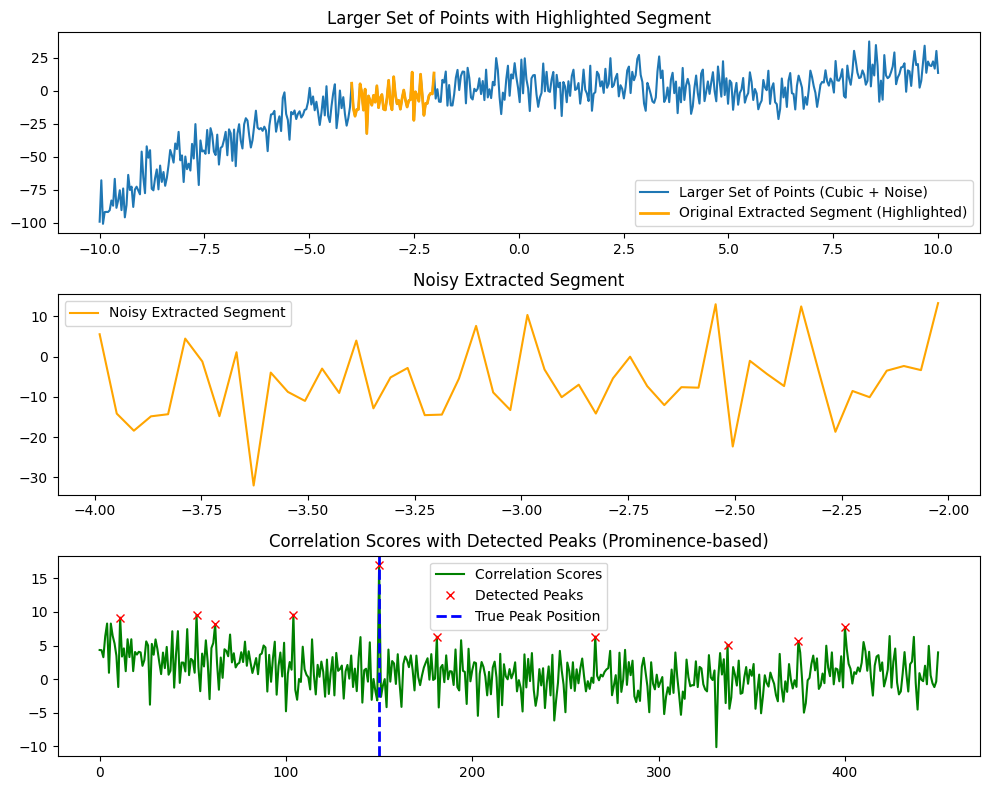

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, find_peaks

# Step 1: Generate a non-periodic cubic polynomial function (e.g., y = ax^3 + bx^2 + cx + d)
x = np.linspace(-10, 10, 500)
y = 0.05*x**3 - 0.4*x**2 + 0.6*x + 3 + 10 * np.random.randn(len(x))  # Add noise to the cubic function

# Step 2: Extract a random segment and add extra noise to it
segment_start = 150
segment_length = 50
segment = y[segment_start:segment_start + segment_length]
segment_noisy = segment + 0.5 * np.random.randn(segment_length)  # Add extra noise to the segment

# Step 3: Normalize both the larger set and the noisy segment
y_normalized = (y - np.mean(y)) / np.std(y)
segment_normalized = (segment_noisy - np.mean(segment_noisy)) / np.std(segment_noisy)

# Step 4: Compute cross-correlation by sliding the normalized noisy segment over the normalized larger set
correlation_scores = correlate(y_normalized, segment_normalized, mode='valid')

# Step 5: Find the peaks in the raw correlation scores using prominence
peaks, properties = find_peaks(correlation_scores, prominence=10)  # Adjust prominence as needed

# Find the peak closest to the actual segment position (for visualization purposes)
actual_position_peak = np.argmax(correlation_scores)

# Step 6: Visualization
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Plot the larger set of points and highlight the segment
axs[0].plot(x, y, label="Larger Set of Points (Cubic + Noise)")
axs[0].plot(x[segment_start:segment_start + segment_length], segment, label="Original Extracted Segment (Highlighted)", color='orange', linewidth=2)
axs[0].set_title("Larger Set of Points with Highlighted Segment")
axs[0].legend()

# Plot the noisy extracted segment
segment_x = x[segment_start:segment_start + segment_length]
axs[1].plot(segment_x, segment_noisy, label="Noisy Extracted Segment", color='orange')
axs[1].set_title("Noisy Extracted Segment")
axs[1].legend()

# Plot raw correlation scores and mark the detected peaks
shift_x = np.arange(len(correlation_scores))
axs[2].plot(shift_x, correlation_scores, label="Correlation Scores", color='green')
axs[2].plot(peaks, correlation_scores[peaks], "x", label="Detected Peaks", color='red')
axs[2].axvline(actual_position_peak, color='blue', linestyle='--', label='True Peak Position', linewidth=2)
axs[2].set_title("Correlation Scores with Detected Peaks (Prominence-based)")
axs[2].legend()

plt.tight_layout()
plt.show()
